# AIFFEL LMS Exploration 5 Project 2 
   - bike_Sharing_demand
   - 시간, 온도, 습도, 계절 데이터를 입력 데이터로
   - 자전거 대여량을 예측
   
   - 손실함수와 기울기를 직접 계산하지 않고
   - sklearn의 LinearRegression 모델을 사용할 것
  

### **(1) 데이터 가져오기**

---

- [여기](https://www.kaggle.com/c/bike-sharing-demand/data)에서 데이터를 다운받습니다.
- 다운받은 파일의 압축을 해제하고 **`bike-sharing-demand/train.csv`** 데이터를 **`train`** 변수로 가져옵니다.

In [141]:

# # 쓸만한 패키지들
# from bs4 import BeautifulSoup     # 이거 해야 seaborn 호출 가능, 몇 가지 데이터 셋도 있음
# import seaborn as sns             # 그래프 그리는 용
# import numpy as np                # np.array 쓸거임, 평균 값 산출 mean 함수 포함, corrcoef 함수도 있음
# import pandas as pd               # DF 쓸거임
# from sklearn import datasets      # diabete 데이터는 여깄음
# from sklearn.model_selection import train_test_split # training, test 데이터 분리 함수
# from sklearn.metrics import mean_squared_error  # MSE 구하는 함수
# import matplotlib.pyplot as plt   # 그래프 그려야함
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'


In [142]:
# 패키지 호출
import csv                        # csv 파일 호출 함수 사용
import pandas as pd               # DataFrame 사용
import os                         # 파일 경로 설정을 위한 패키지
import matplotlib.pyplot as plt   # 그래프 
from bs4 import BeautifulSoup     # seaborn 호출을 위한 패키지, 몇 가지 데이터 셋도 있음
import seaborn as sns             # 그래프 그리는 용
from sklearn.model_selection import train_test_split # training, test 데이터 분리 함수
from math import sqrt             # 제곱근(sqrt) 함수 사용

In [143]:
# 파일 경로 저장

data_path = os.getenv("HOME") + "/aiffel/bike_sharing_demand/data/train.csv"

In [144]:
# train.csv 파일을 DataFrame에 저장

df_train = pd.read_csv(data_path)

# 윈도우용 코드(집 컴퓨터)
# df_train = pd.read_csv('C:/Users/sangu/200812_AIFFEL_notebook/AIFFEL_notebook/aiffel/bike_sharing_demand/data/train.csv')
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### **(2) `datetime` 컬럼을 `datetime` 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기**

---

- **`to_datetime`** 활용 : [링크](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime) 참조
- pandas datetime extract year month day 키워드로 검색해 보기

In [145]:
# datetime 컬럼 확인
# df_train.datetime

In [146]:
# datetime 컬럼 확인
# df_train.datetime.shape

In [147]:
# datetime 컬럼 확인
# type(df_train.datetime)

In [148]:
# pd.to_datetime() 함수 사용
df_train_datetime = pd.to_datetime(df_train.datetime)

In [149]:
# df_train_datetime

In [150]:
# type(df_train_datetime)

In [151]:
# df_train_datetime['year'] = df_train_datetime.dt.year

In [152]:
# dt_train에 년, 월, 일, 시, 분, 초 컬럼 추가

df_train['year'] = df_train_datetime.dt.year
df_train['month'] = df_train_datetime.dt.month
df_train['day'] = df_train_datetime.dt.day
df_train['hour'] = df_train_datetime.dt.hour
df_train['minute'] = df_train_datetime.dt.minute
df_train['second'] = df_train_datetime.dt.second
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### **(3) `year`, `month`, `day`, `hour`, `minute`, `second` 데이터 개수 시각화하기**

---

- **`sns.countplot`** 활용해서 시각화하기
- **`subplot`**을 활용해서 한 번에 6개의 그래프 함께 시각화하기

Text(0.5, 1.0, 'Data Count for second')

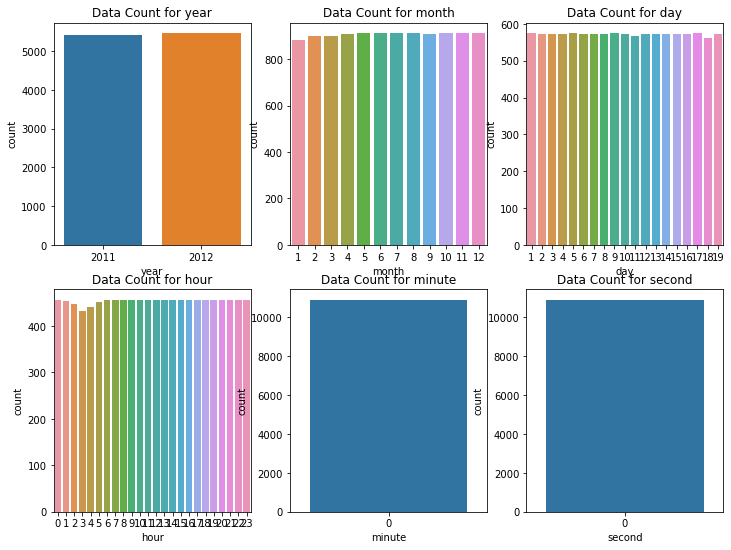

In [153]:
# 그래프 화면 열기 및 사이즈 지정
fig = plt.figure(figsize=(12, 9))

# Subplot 위치 선정 후, 그래프 내용 추가
ax1 = fig.add_subplot(2,3,1)
sns.countplot(x="year", data=df_train)
plt.title("Data Count for year")

ax2 = fig.add_subplot(2,3,2)
sns.countplot(x="month", data=df_train)
plt.title("Data Count for month")

ax3 = fig.add_subplot(2,3,3)
sns.countplot(x="day", data=df_train)
plt.title("Data Count for day")

ax4 = fig.add_subplot(2,3,4)
sns.countplot(x="hour", data=df_train)
plt.title("Data Count for hour")

ax5 = fig.add_subplot(2,3,5)
sns.countplot(x="minute", data=df_train)
plt.title("Data Count for minute")

ax6 = fig.add_subplot(2,3,6)
sns.countplot(x="second", data=df_train)
plt.title("Data Count for second")

### **(4) `X`, `y` 컬럼 선택 및 train/test 데이터 분리**

---

- **`X`**에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기
- **`count`** 값을 맞추고자 하므로, **`y`** 변수에 **`count`** 컬럼의 데이터 넣기

In [154]:
# DataFrame 에서 필요한 열만 뽑아 np.array 자료현으로 저장
X = df_train[['year', 'month', 'day', 'hour', 'minute', 'second', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']].values

# Y = coumt
Y = df_train[['count']].values

# Training, Test Dataset 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

### **(5) LinearRegression 모델 학습**

---

- **`sklearn`**의 **`LinearRegression`** 모델 불러오기 및 학습하기

In [155]:
from sklearn.linear_model import LinearRegression

# 모델 호출
model = LinearRegression()

# 모델 학습
model.fit(X_train, Y_train)

LinearRegression()

### **(6) 학습된 모델로 `X_test`에 대한 예측값 출력 및 손실함수값 계산**

---

- 학습된 모델에 **`X_test`**를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [156]:
# X_test에 대한 모델의 예측값 저장
predictions = model.predict(X_test)

# 예측 값 출력
print(predictions)

[[252.88395131]
 [189.6952292 ]
 [195.48275781]
 ...
 [159.08627243]
 [ 77.06850217]
 [179.08002284]]


In [157]:
# 손실 함수 설계

def MSE(a, b):
    mse = ((a - b) ** 2).mean() # 두 값 차이의 평균
    return mse

def RMSE(a, b):
    rmse = sqrt(MSE(a, b)) # MSE의 제곱근
    return rmse

# MSE와 RMSE를 반환하는 손실함수 생성
def loss_mse(X, Y):
    predictions = model.predict(X)
    L_mse = MSE(predictions, Y)
    L_rmse = RMSE(predictions, Y)
    return L_mse, L_rmse

# X_test와 Y_test 간 loss 구하기
mse_test, rmse_test = loss_mse(X_test, Y_test)

# 값 출력
print("MSE : ", mse_test)
print("RMSE : ", rmse_test)

MSE :  19621.217622613254
RMSE :  140.0757567268985


### **(7) x축은 `temp` 또는 `humidity`로, y축은 `count`로 예측 결과 시각화하기**

---

- x축에 X 데이터 중 **`temp`** 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 **`humidity`** 데이터를, y축에는 count 데이터를 넣어서 시각화하기

In [158]:
# X_Test 데이터에서 온도, 습도 열 추출
X_temp = X_test[:,[9]]
X_humid = X_test[:, [10]]
Count_pred = model.predict(X_test)

In [159]:
X_temp

array([[27.06],
       [10.66],
       [30.34],
       ...,
       [25.42],
       [13.94],
       [27.06]])

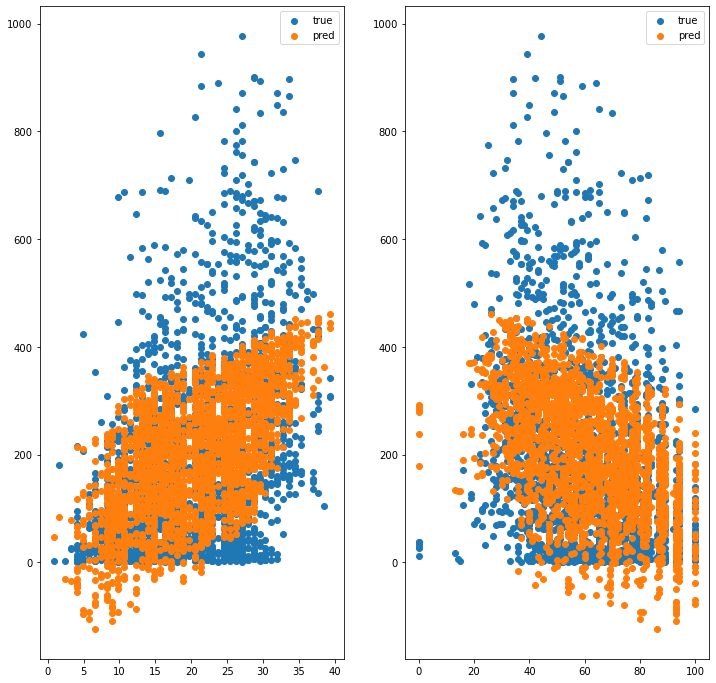

In [160]:
# 데이터 시각화 - 산포도 이용

# 그래프 화면 열기 및 사이즈 지정
fig_tmp_humid = plt.figure(figsize=(12,12))

# Subplot 위치 선정 후, 그래프 내용 추가
ax_1 = fig_tmp_humid.add_subplot(1,2,1)
plt.scatter(X_temp, Y_test, label="true")
plt.scatter(X_temp, Count_pred, label="pred")
plt.legend()

ax_2 = fig_tmp_humid.add_subplot(1,2,2)
plt.scatter(X_humid, Y_test, label="true")
plt.scatter(X_humid, Count_pred, label="pred")
plt.legend()

plt.show()

# 결과 및 고찰

add_subplot함수와 sns.countplot의 사용법도 익숙치 않아서, 처음에는 add_subplot함수로 생성한 객체 값을 이용해 ax1.sns.countplot 식으로 호출하였다가 에러가 발생하였고, 구글 검색을 통해 사용 예시를 살펴보며 해결하였습니다.

pd.to_datetime 함수에 대한 사용법이 익숙하지 않아서 코드 작성간 어려움이 있었고,
많은 시간이 소요되었지만, 구글 검색 및 동료 자문을 구하여 결국 해결하였습니다.

입력 데이터 X의 Feature중에서 casual과 registered가 count를 포함하는 Feature여서 빼주어야 하는데, 
처음 훈련시 이 내용을 알지 못해서 포함시킨 후, 모델을 훈련하였더니, 예측값이 Y_test 데이터와 일치하는 결과가 나왔습니다.
처음에는 원인을 찾지 못하다가 동료들과 논의하여 해결하였습니다.

이번 노드를 통해 혼자서 무언가 노력하여 해결하는 능력도 물론 중요하지만, 동료들과 함께 논의할 때, 
문제를 훨씬 더 빠르고 효과적으로 해결할 수 있다는 점을 깨닳았습니다.